<a href="https://colab.research.google.com/github/Adrita-Khan/Astroinformatics/blob/main/NEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data retrieval successful!
Sample Data:


,name,close_approach_date,absolute_magnitude,estimated_diameter_min_km,estimated_diameter_max_km,is_potentially_hazardous_asteroid,relative_velocity_km_s,miss_distance_km,orbiting_body
0,415711 (1998 WT7),2024-11-21,19.08,0.406027,0.907904,False,25.314787,6.530089e+07,Earth
1,(2004 XJ),2024-11-21,24.00,0.042126,0.094198,False,15.401758,5.050689e+07,Earth
2,(2010 WC),2024-11-21,25.30,0.023150,0.051765,False,9.109659,7.386786e+05,Earth
3,(2010 XG),2024-11-21,20.30,0.231502,0.517654,False,20.555858,4.055065e+07,Earth
4,(2011 AM24),2024-11-21,20.47,0.214070,0.478674,True,3.434345,3.201272e+07,Earth


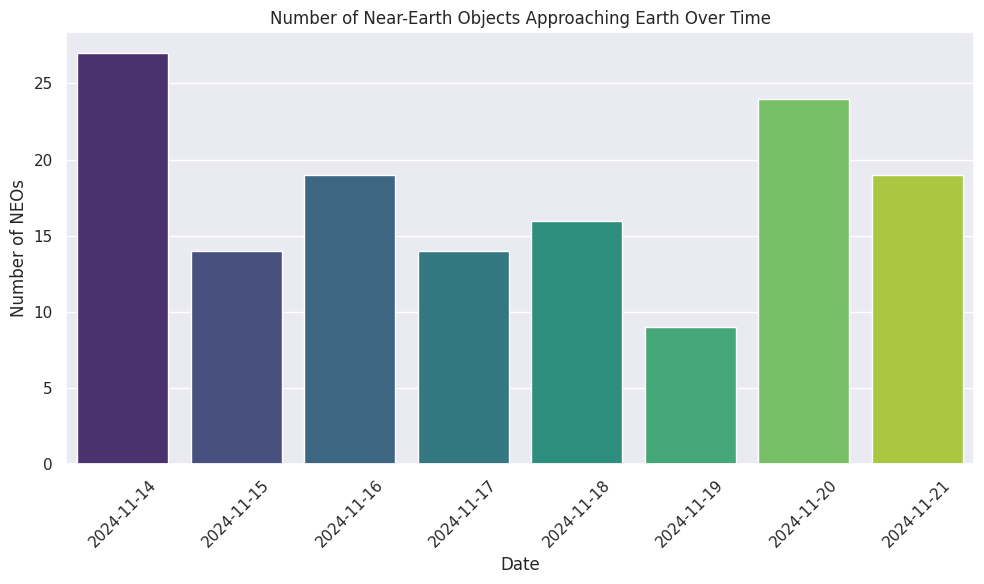

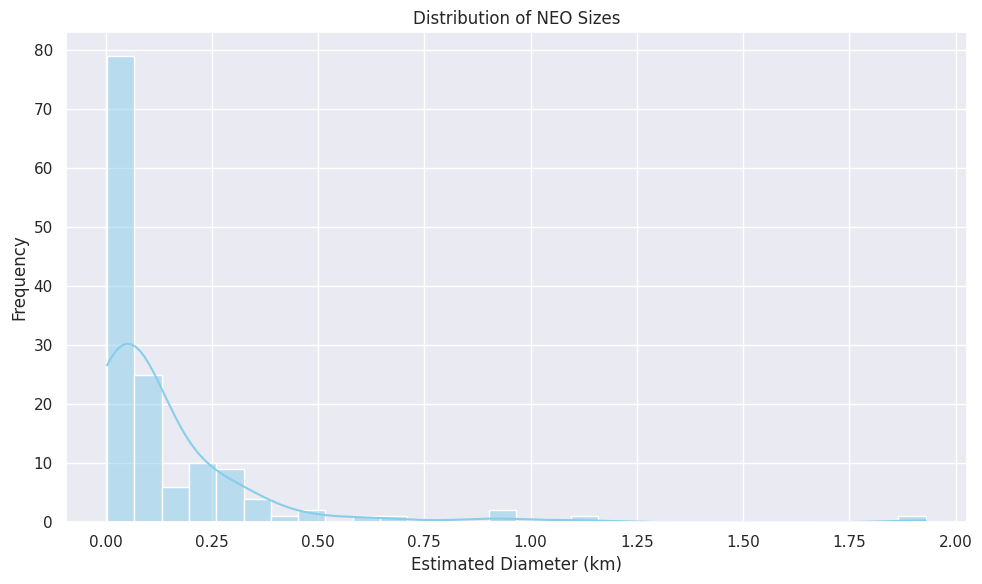

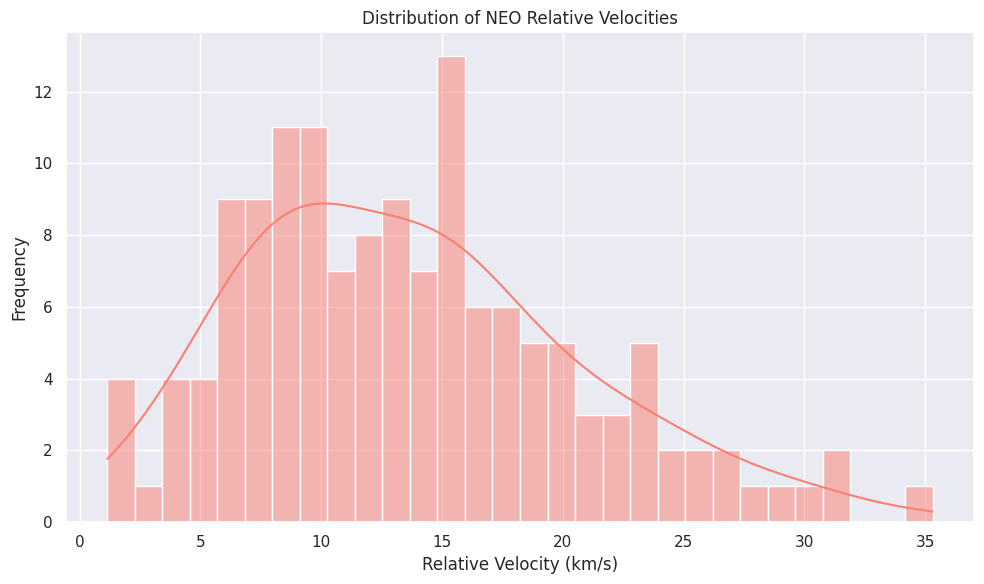

Average Relative Velocity of NEOs: 13.71 km/s

Total NEOs: 142
Potentially Hazardous Asteroids: 10
Percentage of Hazardous NEOs: 7.04%


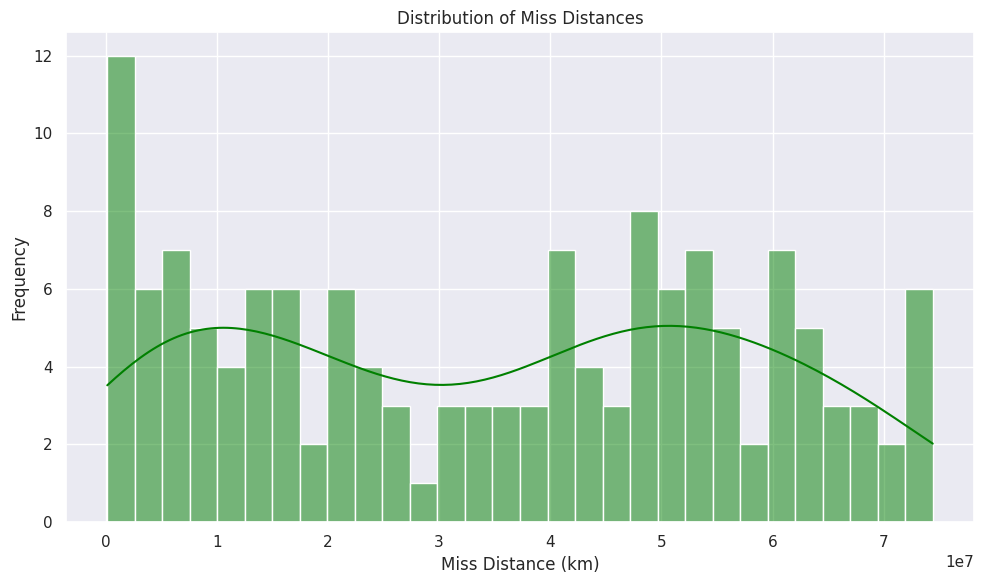


Closest NEO Approach:
Name: (2024 WA)
Miss Distance: 132300.57 km


In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Configure matplotlib
%matplotlib inline
sns.set(style="darkgrid")

# Your NASA API key
API_KEY = 'NuRBNT2VhE9CNuvajboUq0f9aFAC7kzWEZNk9Rvf'

# NeoWS API endpoint
API_ENDPOINT = 'https://api.nasa.gov/neo/rest/v1/feed'

# Define the date range for the data (e.g., past 7 days)
end_date = datetime.today()
start_date = end_date - timedelta(days=7)

# Format dates as YYYY-MM-DD
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Parameters for the API request
params = {
    'start_date': start_date_str,
    'end_date': end_date_str,
    'api_key': API_KEY
}

# Fetch data from the API
response = requests.get(API_ENDPOINT, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data retrieval successful!")
else:
    print(f"Error: {response.status_code}")
    print(response.text)

# Initialize a list to hold all NEOs
neo_list = []

# Iterate through each date in the data
for date in data['near_earth_objects']:
    for neo in data['near_earth_objects'][date]:
        neo_info = {
            'name': neo['name'],
            'close_approach_date': neo['close_approach_data'][0]['close_approach_date'],
            'absolute_magnitude': neo['absolute_magnitude_h'],
            'estimated_diameter_min_km': neo['estimated_diameter']['kilometers']['estimated_diameter_min'],
            'estimated_diameter_max_km': neo['estimated_diameter']['kilometers']['estimated_diameter_max'],
            'is_potentially_hazardous_asteroid': neo['is_potentially_hazardous_asteroid'],
            'relative_velocity_km_s': float(neo['close_approach_data'][0]['relative_velocity']['kilometers_per_second']),
            'miss_distance_km': float(neo['close_approach_data'][0]['miss_distance']['kilometers']),
            'orbiting_body': neo['close_approach_data'][0]['orbiting_body']
        }
        neo_list.append(neo_info)

# Create a DataFrame
neo_df = pd.DataFrame(neo_list)

# Display the first few rows
print("Sample Data:")
display(neo_df.head())

# Convert 'close_approach_date' to datetime
neo_df['close_approach_date'] = pd.to_datetime(neo_df['close_approach_date'])

# Group by date and count NEOs
neo_counts = neo_df.groupby('close_approach_date').size().reset_index(name='count')

# Plot the number of NEOs per day
plt.figure(figsize=(10,6))
sns.barplot(x='close_approach_date', y='count', data=neo_counts, palette='viridis')
plt.xlabel('Date')
plt.ylabel('Number of NEOs')
plt.title('Number of Near-Earth Objects Approaching Earth Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate average estimated diameter
neo_df['estimated_diameter_avg_km'] = (neo_df['estimated_diameter_min_km'] + neo_df['estimated_diameter_max_km']) / 2

plt.figure(figsize=(10,6))
sns.histplot(neo_df['estimated_diameter_avg_km'], bins=30, kde=True, color='skyblue')
plt.xlabel('Estimated Diameter (km)')
plt.ylabel('Frequency')
plt.title('Distribution of NEO Sizes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(neo_df['relative_velocity_km_s'], bins=30, kde=True, color='salmon')
plt.xlabel('Relative Velocity (km/s)')
plt.ylabel('Frequency')
plt.title('Distribution of NEO Relative Velocities')
plt.tight_layout()
plt.show()

# Calculate average velocity
avg_velocity = neo_df['relative_velocity_km_s'].mean()
print(f"Average Relative Velocity of NEOs: {avg_velocity:.2f} km/s")

# Calculate the proportion of potentially hazardous asteroids
hazardous_count = neo_df['is_potentially_hazardous_asteroid'].sum()
total_neo = len(neo_df)
hazardous_percentage = (hazardous_count / total_neo) * 100

print(f"\nTotal NEOs: {total_neo}")
print(f"Potentially Hazardous Asteroids: {hazardous_count}")
print(f"Percentage of Hazardous NEOs: {hazardous_percentage:.2f}%")

plt.figure(figsize=(10,6))
sns.histplot(neo_df['miss_distance_km'], bins=30, kde=True, color='green')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Miss Distances')
plt.tight_layout()
plt.show()

# Find the closest approach
closest_neo = neo_df.loc[neo_df['miss_distance_km'].idxmin()]
print(f"\nClosest NEO Approach:\nName: {closest_neo['name']}\nMiss Distance: {closest_neo['miss_distance_km']:.2f} km")


In [12]:
# Save the DataFrame to a CSV file
output_csv = 'nasa_neo_data.csv'
neo_df.to_csv(output_csv, index=False)
print(f"\nData saved to {output_csv}")


Data saved to nasa_neo_data.csv


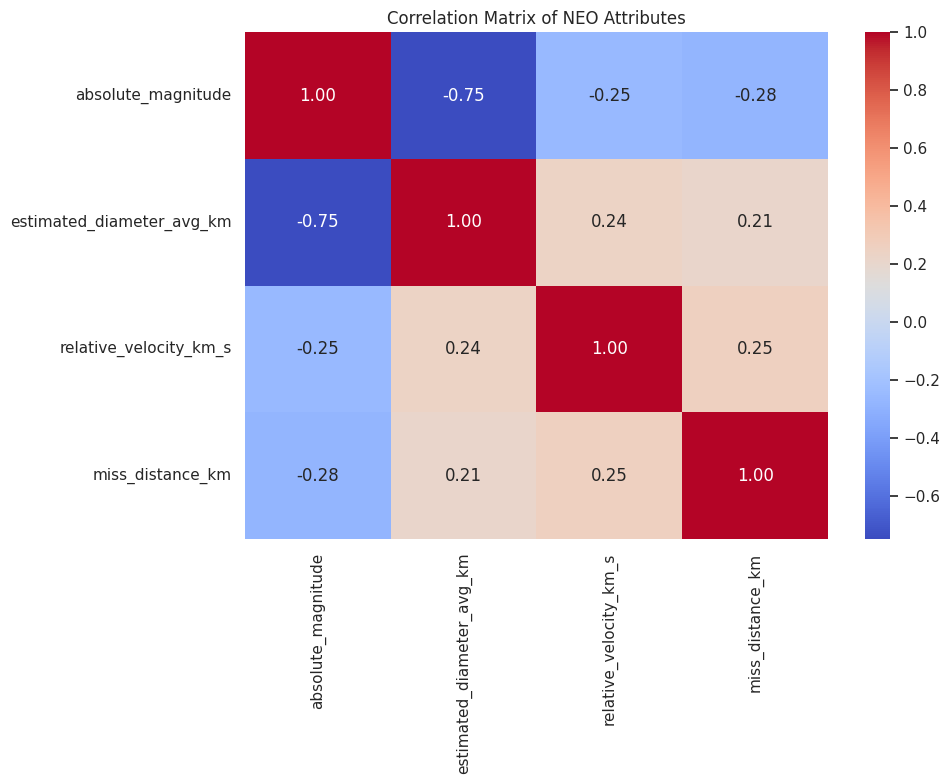

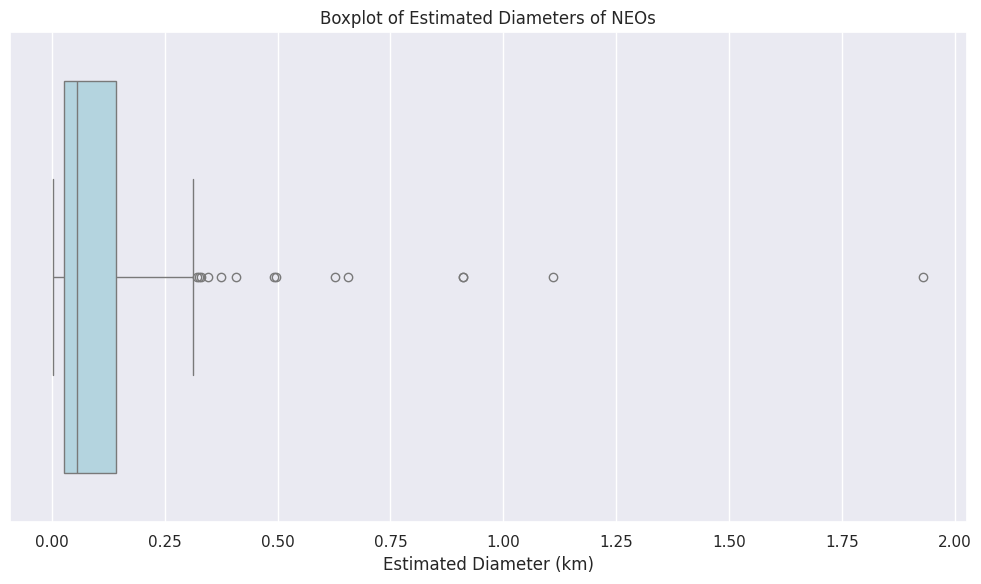

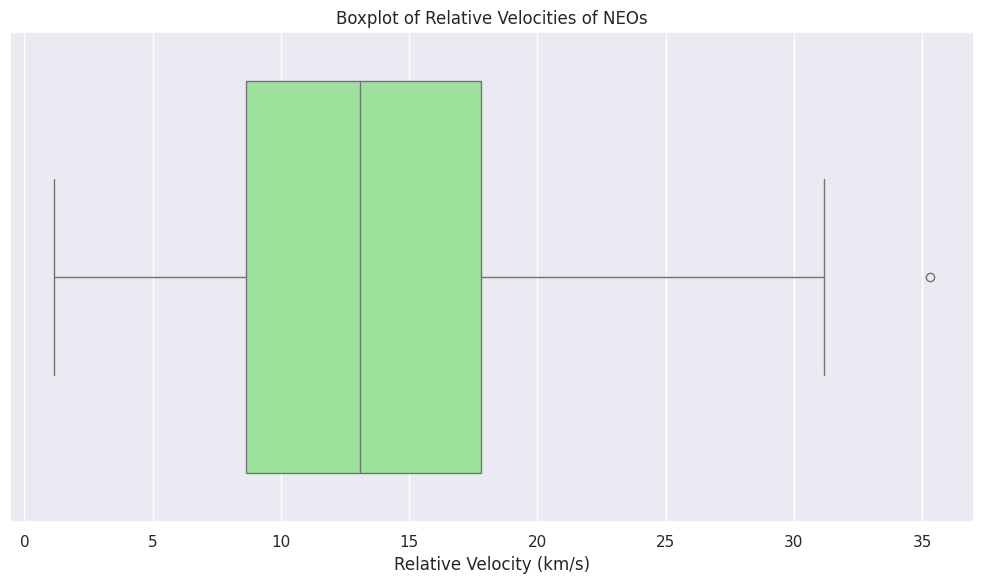


NEO Size Categories:
  Size Category  Count
0         Small     94
1        Medium     42
2         Large      6


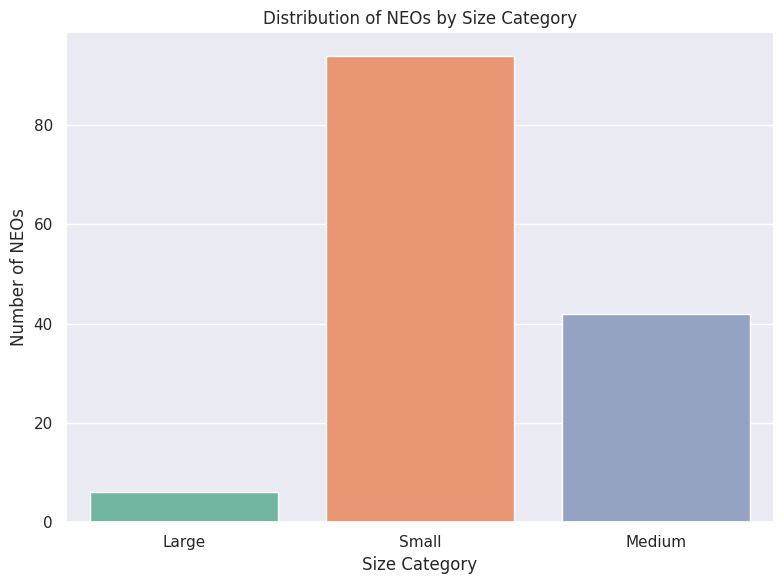


NEOs by Orbiting Body:
  Orbiting Body  Count
0         Earth    142


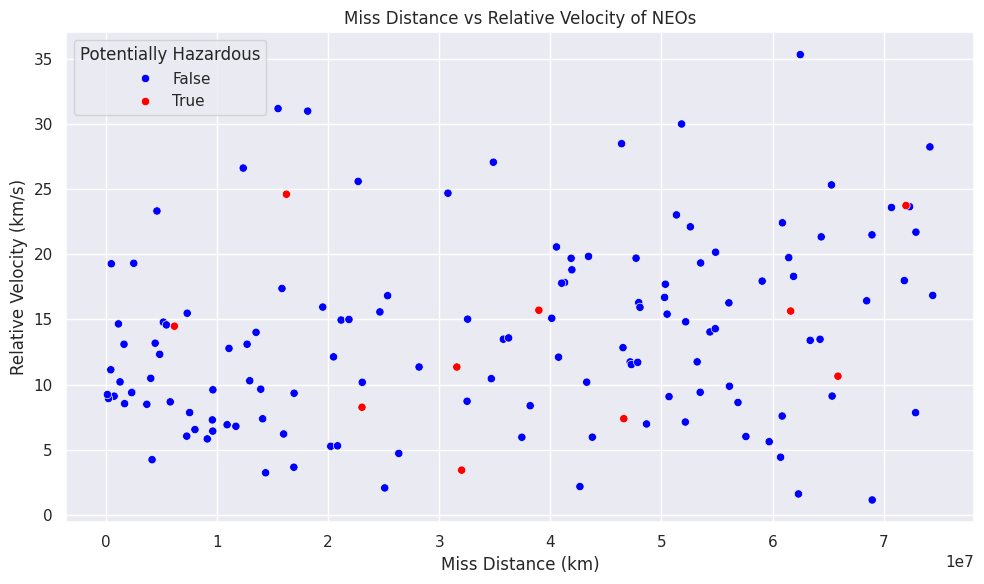


Largest NEO:
Name: 315098 (2007 EX)
Estimated Diameter: 1.930 km

Summary Statistics:


,absolute_magnitude,estimated_diameter_avg_km,relative_velocity_km_s,miss_distance_km
count,142.000000,142.000000,142.000000,1.420000e+02
mean,24.103324,0.138794,13.705050,3.462504e+07
std,2.621926,0.232573,6.923507,2.286491e+07
min,16.740000,0.003661,1.145577,1.323006e+05
25%,22.410000,0.027396,8.637541,1.308514e+07
50%,24.450000,0.055407,13.092302,3.683941e+07
75%,25.980250,0.141797,17.816271,5.341678e+07
max,30.350000,1.929935,35.310028,7.441319e+07


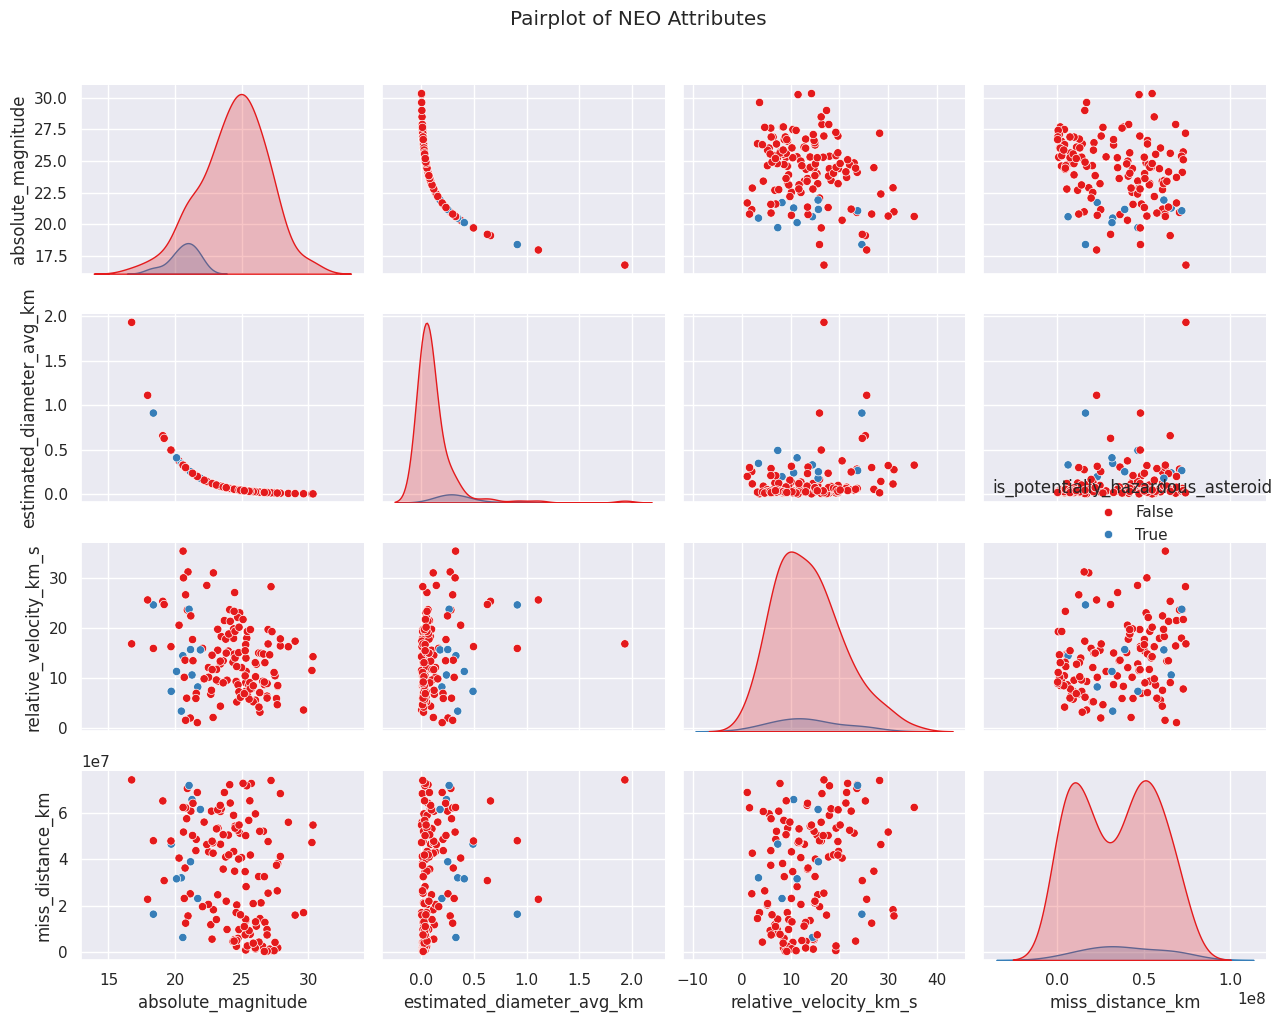

In [13]:
# --- Additional Analyses Below ---

# Correlation Matrix to identify relationships between numerical variables
plt.figure(figsize=(10,8))  # Set figure size
corr_matrix = neo_df[['absolute_magnitude', 'estimated_diameter_avg_km', 'relative_velocity_km_s', 'miss_distance_km']].corr()  # Compute correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create heatmap with annotations
plt.title('Correlation Matrix of NEO Attributes')  # Plot title
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot

# Boxplot of Estimated Diameters to visualize distribution and outliers
plt.figure(figsize=(10,6))  # Set figure size
sns.boxplot(x=neo_df['estimated_diameter_avg_km'], color='lightblue')  # Create boxplot
plt.xlabel('Estimated Diameter (km)')  # X-axis label
plt.title('Boxplot of Estimated Diameters of NEOs')  # Plot title
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot

# Boxplot of Relative Velocities to visualize distribution and outliers
plt.figure(figsize=(10,6))  # Set figure size
sns.boxplot(x=neo_df['relative_velocity_km_s'], color='lightgreen')  # Create boxplot
plt.xlabel('Relative Velocity (km/s)')  # X-axis label
plt.title('Boxplot of Relative Velocities of NEOs')  # Plot title
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot

# Categorize NEOs based on size: Small, Medium, Large
def categorize_size(diameter):
    if diameter < 0.1:
        return 'Small'
    elif 0.1 <= diameter < 0.5:
        return 'Medium'
    else:
        return 'Large'

neo_df['size_category'] = neo_df['estimated_diameter_avg_km'].apply(categorize_size)  # Apply categorization

# Display count of NEOs in each size category
size_counts = neo_df['size_category'].value_counts().reset_index()
size_counts.columns = ['Size Category', 'Count']
print("\nNEO Size Categories:")
print(size_counts)

# Plot the distribution of NEO size categories
plt.figure(figsize=(8,6))  # Set figure size
sns.countplot(x='size_category', data=neo_df, palette='Set2')  # Create count plot
plt.xlabel('Size Category')  # X-axis label
plt.ylabel('Number of NEOs')  # Y-axis label
plt.title('Distribution of NEOs by Size Category')  # Plot title
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot

# Analysis of Orbiting Bodies
orbit_counts = neo_df['orbiting_body'].value_counts().reset_index()
orbit_counts.columns = ['Orbiting Body', 'Count']
print("\nNEOs by Orbiting Body:")
print(orbit_counts)


# Scatter plot of Miss Distance vs Relative Velocity
plt.figure(figsize=(10,6))  # Set figure size
sns.scatterplot(x='miss_distance_km', y='relative_velocity_km_s', hue='is_potentially_hazardous_asteroid', data=neo_df, palette=['blue', 'red'])  # Create scatter plot
plt.xlabel('Miss Distance (km)')  # X-axis label
plt.ylabel('Relative Velocity (km/s)')  # Y-axis label
plt.title('Miss Distance vs Relative Velocity of NEOs')  # Plot title
plt.legend(title='Potentially Hazardous')  # Legend title
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot

# Identify the largest NEO in the dataset
largest_neo = neo_df.loc[neo_df['estimated_diameter_avg_km'].idxmax()]  # Locate NEO with maximum diameter
print(f"\nLargest NEO:\nName: {largest_neo['name']}\nEstimated Diameter: {largest_neo['estimated_diameter_avg_km']:.3f} km")  # Print largest NEO details

# Display a summary statistics table
print("\nSummary Statistics:")
summary_stats = neo_df[['absolute_magnitude', 'estimated_diameter_avg_km', 'relative_velocity_km_s', 'miss_distance_km']].describe()  # Compute summary statistics
display(summary_stats)  # Display the table

# Pairplot to visualize relationships between key numerical variables
sns.pairplot(neo_df[['absolute_magnitude', 'estimated_diameter_avg_km', 'relative_velocity_km_s', 'miss_distance_km', 'is_potentially_hazardous_asteroid']],
             hue='is_potentially_hazardous_asteroid', palette='Set1')  # Create pairplot with hue
plt.suptitle('Pairplot of NEO Attributes', y=1.02)  # Add a super title
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot

In [14]:
# Directory to save plots
import os

plots_dir = 'neo_plots'
os.makedirs(plots_dir, exist_ok=True)

# Example: Save the number of NEOs per day plot
plt.figure(figsize=(10,6))
sns.barplot(x='close_approach_date', y='count', data=neo_counts, palette='viridis')
plt.xlabel('Date')
plt.ylabel('Number of NEOs')
plt.title('Number of Near-Earth Objects Approaching Earth Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plot_path = os.path.join(plots_dir, 'neo_counts_per_day.png')
plt.savefig(plot_path)
plt.close()
print(f"Plot saved to {plot_path}")

# Repeat similar steps for other plots as needed

Plot saved to neo_plots/neo_counts_per_day.png


In [16]:
pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [17]:
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Initialize Dash app
app = dash.Dash(__name__)

# Create a Plotly figure for NEO counts per day
fig_counts = px.bar(neo_counts, x='close_approach_date', y='count',
                    title='Number of NEOs per Day',
                    labels={'close_approach_date': 'Date', 'count': 'Number of NEOs'},
                    template='plotly_dark')

# Layout of the Dash app
app.layout = html.Div([
    html.H1("NASA NEO Dashboard"),
    dcc.Graph(id='neo-counts', figure=fig_counts),

    html.H2("Distribution of NEO Sizes"),
    dcc.Graph(
        figure=px.histogram(neo_df, x='estimated_diameter_avg_km', nbins=30,
                           title='Distribution of NEO Sizes',
                           labels={'estimated_diameter_avg_km': 'Estimated Diameter (km)'})
    ),

    html.H2("Miss Distance vs Relative Velocity"),
    dcc.Graph(
        figure=px.scatter(neo_df, x='miss_distance_km', y='relative_velocity_km_s',
                         color='is_potentially_hazardous_asteroid',
                         title='Miss Distance vs Relative Velocity',
                         labels={'miss_distance_km': 'Miss Distance (km)',
                                 'relative_velocity_km_s': 'Relative Velocity (km/s)'},
                         hover_data=['name'])
    ),

    # Add more interactive plots as needed
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [18]:
pip install schedule

In [ ]:
import schedule
import time

def fetch_and_analyze_neo_data():
    # Place the entire data fetching and analysis code here
    # For example:
    # 1. Fetch data from NASA API
    # 2. Process the data
    # 3. Update CSV and plots
    # 4. Log or notify upon completion
    print(f"Fetching and analyzing data at {datetime.now()}")

    # ... (Insert your existing code here)

    # Save updated data
    neo_df.to_csv(output_csv, index=False)
    print(f"Data saved to {output_csv} at {datetime.now()}")

    # Save updated plots
    # ... (Insert plot saving code here)

    print("Data fetching and analysis completed.\n")

# Schedule the job to run once a day
schedule.every().day.at("10:00").do(fetch_and_analyze_neo_data)

print("Scheduler started. Press Ctrl+C to exit.")

while True:
    schedule.run_pending()
    time.sleep(1)

Scheduler started. Press Ctrl+C to exit.
